# Natural Language Processing 2 - Addtional Topics

In [1]:
import nltk

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pogupt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
#Load the data from dataset
data = pd.read_csv('SMSSpamCollection', sep='\t' , names=['label','message'])

In [19]:
data

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


#### **Exploratory Data Analysis (EDA)**

In [8]:
data.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
data.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

### Visual  EDA

In [20]:
data['msgLen']=data.message.apply(len)
data

,label,message,msgLen
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


<AxesSubplot:ylabel='Frequency'>

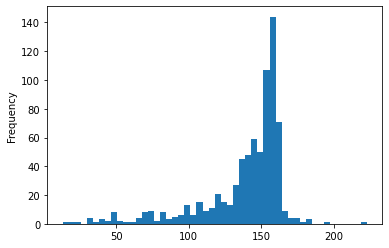

In [11]:
data[data['label']=='spam'].msgLen.plot(bins=50,kind='hist')

<AxesSubplot:ylabel='Frequency'>

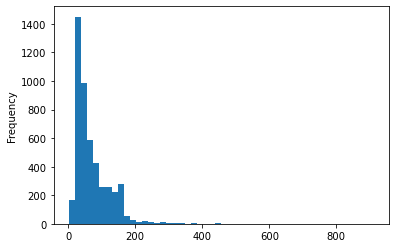

In [12]:
data[data['label']=='ham'].msgLen.plot(bins=50,kind='hist')

In [ ]:
data[data['label']=='spam'].msgLen.max()

In [ ]:
data[data['label']=='spam'].msgLen.mean()

In [ ]:
data[data['label']=='spam'].msgLen.min()

In [ ]:
data[data['label']=='ham'].msgLen.max()

In [ ]:
data[data['label']=='ham'].msgLen.mean()

In [ ]:
data[data['label']=='ham'].msgLen.min()

In [13]:
data.groupby('label').msgLen.describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
ham,4825.0,71.482487,58.440652,2.0,33.0,52.0,93.0,910.0
spam,747.0,138.670683,28.873603,13.0,133.0,149.0,157.0,223.0


In [21]:
def textPreprocessing(data):
    #Remove Punctuation Logic
    import string
    removePunctuation = [char for char in data if char not in string.punctuation]
    
    #Join Chars to form sentences
    sentenceWithoutPunctuations = ''.join(removePunctuation)
    sentence = sentenceWithoutPunctuations.split()
    
    #StopwordRemoval
    from nltk.corpus import stopwords
    removeStopwords = [word for word in sentence if word.lower() not in stopwords.words('english')]
    
    return removeStopwords

In [22]:
#Text preprocessing
data['message'].head().apply(textPreprocessing)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [23]:
data

,label,message,msgLen
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [24]:
# Create Bag of Words - sklearn package CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
?CountVectorizer
#1. lowercases your text (set lowercase=false if you don’t want lowercasing)
#2. performs tokenization (converts raw text to smaller units of text)
#3. uses word level tokenization (meaning each word is treated as a separate token)
#4. ignores single characters during tokenization (say goodbye to words like ‘a’ and ‘I’)

In [25]:
bow = CountVectorizer(analyzer=textPreprocessing,min_df=4).fit(data['message'])

In [26]:
# show resulting vocabulary; the numbers are not counts, they are the position in the sparse vector.
bow.vocabulary_

{'Go': 299,
 'point': 1696,
 'crazy': 984,
 'bugis': 865,
 'n': 1570,
 'great': 1241,
 'world': 2228,
 'la': 1385,
 'e': 1071,
 'got': 1235,
 'wat': 2162,
 'Ok': 470,
 'lar': 1392,
 'wif': 2198,
 'u': 2102,
 'oni': 1621,
 'Free': 274,
 'entry': 1102,
 '2': 43,
 'wkly': 2214,
 'comp': 952,
 'win': 2202,
 'final': 1157,
 'tkts': 2052,
 'May': 416,
 'Text': 597,
 '87121': 109,
 'receive': 1763,
 'txt': 2096,
 'apply': 759,
 'U': 622,
 'dun': 1069,
 'say': 1828,
 'early': 1073,
 'c': 873,
 'already': 736,
 'Nah': 446,
 'dont': 1051,
 'think': 2030,
 'goes': 1229,
 'usf': 2125,
 'lives': 1438,
 'around': 769,
 'though': 2037,
 'FreeMsg': 275,
 'Hey': 334,
 'darling': 1006,
 '3': 59,
 'weeks': 2180,
 'word': 2222,
 'back': 800,
 'Id': 351,
 'like': 1429,
 'fun': 1199,
 'still': 1961,
 'ok': 1615,
 'std': 1960,
 'send': 1853,
 '£150': 2275,
 'Even': 253,
 'brother': 860,
 'speak': 1940,
 'treat': 2079,
 'per': 1657,
 'request': 1785,
 'set': 1862,
 'callertune': 880,
 'Callers': 184,
 'Press'

In [27]:
len(bow.vocabulary_)

2294

In [28]:
bow1 = CountVectorizer(analyzer=textPreprocessing,min_df=2).fit(data['message'])
bow1.vocabulary_

{'Go': 847,
 'point': 3770,
 'crazy': 2407,
 'Available': 450,
 'bugis': 2159,
 'n': 3542,
 'great': 2923,
 'world': 4778,
 'la': 3220,
 'e': 2598,
 'buffet': 2158,
 'got': 2912,
 'wat': 4680,
 'Ok': 1281,
 'lar': 3233,
 'wif': 4732,
 'u': 4568,
 'oni': 3641,
 'Free': 793,
 'entry': 2646,
 '2': 162,
 'wkly': 4759,
 'comp': 2343,
 'win': 4738,
 'FA': 746,
 'Cup': 627,
 'final': 2754,
 'tkts': 4483,
 '21st': 175,
 'May': 1150,
 '2005': 169,
 'Text': 1613,
 '87121': 356,
 'receive': 3916,
 'questionstd': 3866,
 'txt': 4562,
 'rateTCs': 3890,
 'apply': 1948,
 '08452810075over18s': 35,
 'U': 1667,
 'dun': 2595,
 'say': 4050,
 'early': 2601,
 'hor': 3023,
 'c': 2178,
 'already': 1907,
 'Nah': 1229,
 'dont': 2557,
 'think': 4446,
 'goes': 2899,
 'usf': 4610,
 'lives': 3300,
 'around': 1967,
 'though': 4455,
 'FreeMsg': 794,
 'Hey': 911,
 'darling': 2448,
 '3': 211,
 'weeks': 4702,
 'word': 4771,
 'back': 2017,
 'Id': 957,
 'like': 3281,
 'fun': 2844,
 'still': 4300,
 'ok': 3633,
 'XxX': 1799,

In [29]:
len(bow1.vocabulary_)

4894

In [30]:
message_bow = bow.transform(data['message'])

In [31]:
message_bow.shape

(5572, 2294)

In [33]:
pd.DataFrame(message_bow.toarray())

,0,1,2,3,4,5,6,7,8,9,...,2284,2285,2286,2287,2288,2289,2290,2291,2292,2293
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Working With N-Grams - Word level – bigrams only**

In [38]:
bow2gram = CountVectorizer(min_df=3,ngram_range=(2,2)).fit(data['message'])

In [39]:
bow2gram.vocabulary_

{'ok lar': 2954,
 'free entry': 1300,
 'entry in': 1164,
 'wkly comp': 4789,
 'to win': 4220,
 'cup final': 947,
 'to 87121': 4094,
 'to receive': 4181,
 'std txt': 3670,
 'txt rate': 4314,
 'rate apply': 3296,
 'so early': 3560,
 'don think': 1090,
 'think he': 4016,
 'to usf': 4214,
 'here though': 1705,
 'freemsg hey': 1321,
 'hey there': 1709,
 'it been': 2027,
 'week now': 4589,
 'now and': 2833,
 'some fun': 3601,
 'you up': 5022,
 'up for': 4349,
 'for it': 1253,
 'it still': 2066,
 'to send': 4188,
 '50 to': 125,
 'even my': 1172,
 'my brother': 2630,
 'is not': 1990,
 'not like': 2809,
 'like to': 2269,
 'with me': 4771,
 'me they': 2474,
 'me like': 2450,
 'as per': 421,
 'per your': 3164,
 'your request': 5096,
 'request melle': 3365,
 'melle melle': 2503,
 'melle oru': 2504,
 'oru minnaminunginte': 3094,
 'minnaminunginte nurungu': 2528,
 'nurungu vettam': 2880,
 'vettam has': 4451,
 'has been': 1600,
 'been set': 552,
 'set as': 3476,
 'as your': 428,
 'your callertune': 5

In [40]:
len(bow.vocabulary_)

2294

In [41]:
# Word Cloud - https://www.datacamp.com/community/tutorials/wordcloud-python
## conda install -c conda-forge wordcloud
## conda update --all

#!pip install wordcloud
import wordcloud

In [42]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

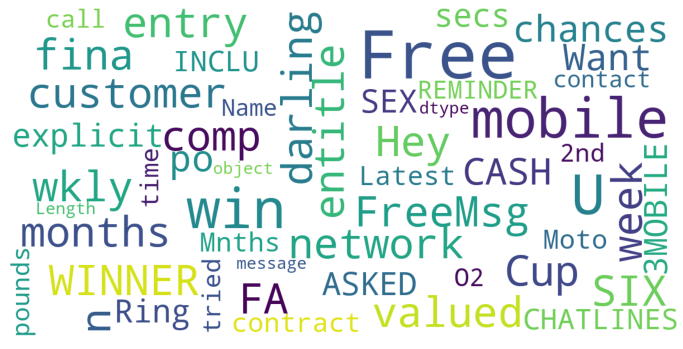

In [43]:
#show_wordcloud()
show_wordcloud(data[data['label']=='spam'].message)

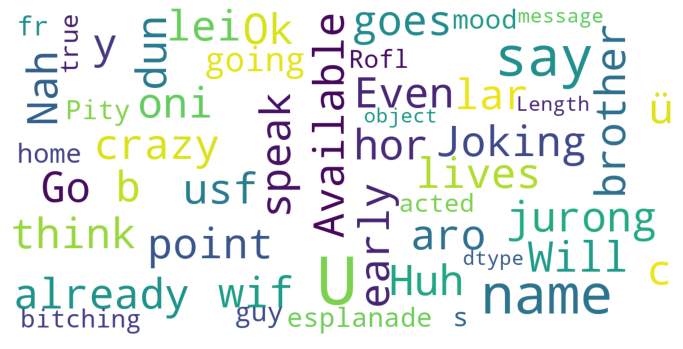

In [44]:
show_wordcloud(data[data['label']=='ham'].message)

In [45]:
#TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer

In [46]:
tfidfData = TfidfTransformer(use_idf=False).fit(message_bow)
tfidfDataFinal = tfidfData.transform(message_bow)

In [47]:
tfidfData = TfidfTransformer(use_idf=True).fit(message_bow)
tfidfDataFinal = tfidfData.transform(message_bow)

In [48]:
print(tfidfData.idf_[bow.vocabulary_['WIN']])

6.629956514015546


In [49]:
tfidfDataFinal.shape


(5572, 2294)

In [50]:
pd.DataFrame(tfidfDataFinal.toarray()).tail()

,0,1,2,3,4,5,6,7,8,9,...,2284,2285,2286,2287,2288,2289,2290,2291,2292,2293
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.413451,0.0,0.0
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
5571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


### Classification Machine Learning Model 

In [ ]:
# Data is ready to be supplied in a machine learning algo

In [52]:
#Training the model --- NaiveBayes Algo
#Handling String data ---- MultinomialNB
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(tfidfDataFinal,data['label'])

In [53]:
model

MultinomialNB()

In [54]:
trainPred=model.predict(tfidfDataFinal)

In [55]:
pd.crosstab(data['label'],trainPred)

col_0,ham,spam
label,,
ham,4822,3
spam,85,662


In [56]:
inputData = 'Win Lottery Guaranteed'
l1 = textPreprocessing(inputData)
l2 = bow.transform(l1)
l3 = tfidfData.transform(l2)

In [58]:
l3

<3x2294 sparse matrix of type '<class 'numpy.float64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [57]:
prediction = model.predict_proba(l3[0])
prediction

array([[0.31872276, 0.68127724]])